### Maximum Entropy Inverse Reinforcement Learning (MaxEnt IRL)

#### Problem Setup
The objective is to recover the reward function $R(s)$ in a Markov Decision Process (MDP) such that the demonstrated expert trajectories are most likely under a stochastic policy maximizing the entropy of the action distribution.

---

#### Transition Model
For an MDP with:
- $S$: number of states,
- $A$: number of actions,
- $P(s'|s,a)$: transition probabilities,
- $\gamma$: discount factor,

the expert trajectories $\mathcal{D}$ specify the state-action-next state tuples $(s, a, s')$ sampled from the expert policy.

---

#### Reward Function
The reward function is modeled as:
$$
R(s) = \phi(s)^T \theta,
$$
where:
- $\phi(s)$: feature vector for state $s$,
- $\theta$: parameter vector to be learned.

---

#### Feature Expectations
Feature expectations from expert trajectories $\mathcal{D}$ are:
$$
\mu_D = \frac{1}{|\mathcal{D}|} \sum_{\tau \in \mathcal{D}} \sum_{t=0}^\infty \gamma^t \phi(s_t),
$$
where $s_t$ is the state at time $t$ in trajectory $\tau$.

---

#### Policy Model
The stochastic policy $\pi(a|s)$ is derived from the softmax of the $Q$-values:
$$
\pi(a|s) = \frac{\exp(Q(s, a))}{\sum_{a'} \exp(Q(s, a'))},
$$
where:
$$
Q(s, a) = R(s) + \gamma \sum_{s'} P(s'|s, a) V(s'),
$$
and the value function $V(s)$ is:
$$
V(s) = \log \sum_a \exp(Q(s, a)).
$$

---

#### State Visitation Frequencies
The expected state visitation frequencies under the policy $\pi(a|s)$ are:
$$
\text{svf}(s) = \sum_{t=0}^\infty \gamma^t D_t(s),
$$
where $D_t(s)$ is the state distribution at time $t$, computed iteratively:
$$
D_{t+1}(s') = \sum_{s,a} D_t(s) \pi(a|s) P(s'|s, a).
$$

---

#### Optimization Objective
MaxEnt IRL optimizes $\theta$ to match feature expectations under the learned policy $\pi$ with the expert feature expectations:
$$
\min_\theta \|\mu_D - \mu_\pi\|^2,
$$
where:
- $\mu_\pi = \sum_s \text{svf}(s) \phi(s)$,
- $\mu_D$: feature expectations from expert trajectories.

---

#### Algorithm Steps
1. **Initialization**:
   - Compute expert feature expectations $\mu_D$ from trajectories.
   - Initialize $\theta$ randomly.

2. **Reward Function**:
   - Compute $R(s) = \phi(s)^T \theta$.

3. **Value Function**:
   - Solve for $V(s)$ using the Maximum Entropy value iteration:
   $$
   V(s) = \log \sum_a \exp \left(R(s) + \gamma \sum_{s'} P(s'|s, a) V(s') \right).
   $$

4. **Policy**:
   - Compute the stochastic policy:
   $$
   \pi(a|s) = \frac{\exp \left(R(s) + \gamma \sum_{s'} P(s'|s, a) V(s') \right)}{\sum_{a'} \exp \left(R(s) + \gamma \sum_{s'} P(s'|s, a') V(s') \right)}.
   $$

5. **State Visitation Frequencies**:
   - Estimate $\text{svf}(s)$ iteratively using:
   $$
   D_{t+1}(s') = \sum_{s,a} D_t(s) \pi(a|s) P(s'|s, a).
   $$

6. **Gradient Update**:
   - Compute gradient:
   $$
   \nabla_\theta = \mu_D - \mu_\pi.
   $$
   - Update $\theta$:
   $$
   \theta \gets \theta + \eta \nabla_\theta,
   $$
   where $\eta$ is the learning rate.

7. **Convergence**:
   - Repeat until $\|\mu_D - \mu_\pi\|$ is below a threshold.

---

#### Experimental Setup
- **MDP Properties**:
  - $S = 10$: number of states,
  - $A = 10$: number of actions,
  - $\gamma = 0.9$: discount factor,
  - Maximum reward $R_{\text{max}} = 10$.

- **Simulation**:
  1. Generate random MDP parameters $R_{\text{true}}$ and $P(s'|s,a)$.
  2. Compute expert policy $\pi^*$ using $R_{\text{true}}$ and value iteration.
  3. Generate $50$ expert trajectories $\mathcal{D}$.
  4. Apply MaxEnt IRL to recover $R_{\text{est}}$.
  5. Compare $R_{\text{true}}$ with $R_{\text{est}}$ and $\pi^*$ with the estimated policy.

---

#### Visualization
1. **Rewards**:
   - Bar plot comparing $R_{\text{true}}$ and $R_{\text{est}}$.
2. **Policies**:
   - Line plot comparing $\pi^*$ and the estimated policy.

---

#### Iterative Algorithm Summary
1. Initialize $\theta$ and compute $\mu_D$.
2. For each iteration:
   - Compute $R(s)$, $V(s)$, $\pi(a|s)$, and $\text{svf}(s)$.
   - Update $\theta$ using the gradient $\nabla_\theta = \mu_D - \mu_\pi$.
3. Repeat until convergence.

Iteration 0, Loss: 1.5913694322211067
Iteration 1, Loss: 1.5911728306602957
Iteration 2, Loss: 1.5909828833774768
Iteration 3, Loss: 1.590799365698397
Iteration 4, Loss: 1.5906220604935408
Iteration 5, Loss: 1.5904507579279439
Iteration 6, Loss: 1.5902852552190527
Iteration 7, Loss: 1.5901253564023954
Iteration 8, Loss: 1.589970872104814
Iteration 9, Loss: 1.5898216193250507
Iteration 10, Loss: 1.5896774212214533
Iteration 11, Loss: 1.589538106906589
Iteration 12, Loss: 1.589403511248559
Iteration 13, Loss: 1.5892734746787909
Iteration 14, Loss: 1.5891478430061357
Iteration 15, Loss: 1.5890264672370478
Iteration 16, Loss: 1.5889092034016739
Iteration 17, Loss: 1.5887959123856572
Iteration 18, Loss: 1.588686459767489
Iteration 19, Loss: 1.5885807156612106
Iteration 20, Loss: 1.5884785545643219
Iteration 21, Loss: 1.5883798552107102
Iteration 22, Loss: 1.5882845004284507
Iteration 23, Loss: 1.5881923770023187
Iteration 24, Loss: 1.5881033755408622
Iteration 25, Loss: 1.5880173903478851
I

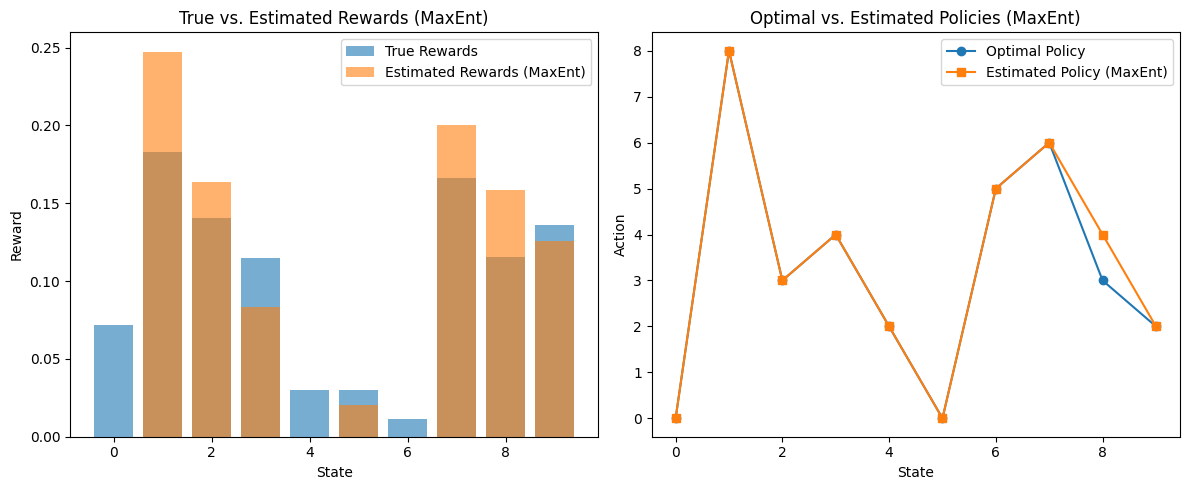

True Reward Function:
[0.07 0.18 0.14 0.12 0.03 0.03 0.01 0.17 0.12 0.14]

Estimated Reward Function (MaxEnt):
[0.   0.25 0.16 0.08 0.   0.02 0.   0.2  0.16 0.13]

Difference in Reward Function:
[ 0.07 -0.06 -0.02  0.03  0.03  0.01  0.01 -0.03 -0.04  0.01]

Optimal Policy:
[0 8 3 4 2 0 5 6 3 2]

Estimated Policy (MaxEnt):
[0 8 3 4 2 0 5 6 4 2]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv

def generate_random_mdp(num_states, num_actions, max_reward):
    # Generate random rewards, ensure they sum to 1, and are in the range (0, 1)
    R_true = np.random.uniform(0.0001, max_reward, size=num_states)  # values > 0
    R_true /= R_true.sum()  # Normalize so they sum to 1
    
    Pssa = np.zeros((num_states, num_states, num_actions))
    for s in range(num_states):
        for a in range(num_actions):
            probabilities = np.random.rand(num_states)
            probabilities /= probabilities.sum()
            Pssa[s, :, a] = probabilities
    return R_true, Pssa


def value_iteration(num_states, num_actions, rewards, transition_probabilities, discount_factor, epsilon=1e-6, max_iterations=1000):
    V = np.zeros(num_states)
    policy = np.zeros(num_states, dtype=int)
    for _ in range(max_iterations):
        V_prev = V.copy()
        Q = np.zeros((num_states, num_actions))
        for s in range(num_states):
            for a in range(num_actions):
                Q[s, a] = rewards[s] + discount_factor * transition_probabilities[s, :, a] @ V_prev
        V_new = np.max(Q, axis=1)
        policy = np.argmax(Q, axis=1)
        if np.max(np.abs(V_new - V_prev)) < epsilon:
            V = V_new
            break
        V = V_new
    return V, policy

def generate_trajectory(Pssa, policy, start_state, num_states, max_steps=100):
    trajectory = []
    state = start_state
    for _ in range(max_steps):
        action = policy[state]
        next_state_prob = Pssa[state, :, action]
        next_state = np.random.choice(range(num_states), p=next_state_prob)
        trajectory.append((state, action, next_state))
        state = next_state
    return trajectory

def generate_trajectories(num_trajectories, Pssa, policy, num_states, start_states=None, max_steps=100):
    trajectories = []
    if start_states is None:
        start_states = range(num_states)
    for _ in range(num_trajectories):
        start_state = np.random.choice(start_states)
        traj = generate_trajectory(Pssa, policy, start_state, num_states, max_steps)
        trajectories.append(traj)
    return trajectories

def generate_soft_trajectory(Pssa, policy, start_state, num_states, max_steps=100):
    """
    Generate a single trajectory using a soft policy.
    """
    trajectory = []
    state = start_state
    for _ in range(max_steps):
        # Sample action probabilistically from the soft policy
        action_probabilities = policy[state]
        action = np.random.choice(range(len(action_probabilities)), p=action_probabilities)

        # Sample next state based on the chosen action's transition probabilities
        next_state_prob = Pssa[state, :, action]
        next_state = np.random.choice(range(num_states), p=next_state_prob)

        # Append (state, action, next_state) to the trajectory
        trajectory.append((state, action, next_state))
        state = next_state
    return trajectory

def generate_soft_trajectories(num_trajectories, Pssa, policy, num_states, start_states=None, max_steps=100):
    """
    Generate multiple trajectories using a soft policy.
    """
    trajectories = []
    if start_states is None:
        start_states = range(num_states)
    for _ in range(num_trajectories):
        start_state = np.random.choice(start_states)
        traj = generate_soft_trajectory(Pssa, policy, start_state, num_states, max_steps)
        trajectories.append(traj)
    return trajectories

def state_features(num_states):
    return np.identity(num_states)

def feature_expectations(features, trajectories, discount_factor):
    num_features = features.shape[1]
    mu = np.zeros(num_features)
    for traj in trajectories:
        for t, (s, a, s_next) in enumerate(traj):
            mu += (discount_factor ** t) * features[s]
    mu /= len(trajectories)
    return mu

def initial_state_distribution(num_states, trajectories):
    d0 = np.zeros(num_states)
    for traj in trajectories:
        start_state = traj[0][0]
        d0[start_state] += 1
    d0 /= len(trajectories)
    return d0

def maxent_value_iteration(num_states, num_actions, Pssa, reward, discount, eps=1e-5):
    V = np.zeros(num_states)
    delta = np.inf
    while delta > eps:
        V_old = V.copy()
        Q = np.zeros((num_states, num_actions))
        for s in range(num_states):
            for a in range(num_actions):
                Q[s, a] = reward[s] + discount * Pssa[s, :, a] @ V_old
        V = np.log(np.sum(np.exp(Q - np.max(Q, axis=1, keepdims=True)), axis=1)) + np.max(Q, axis=1)
        delta = np.max(np.abs(V - V_old))
    return V

def compute_policy(num_states, num_actions, Pssa, reward, V, discount):
    Q = np.zeros((num_states, num_actions))
    for s in range(num_states):
        for a in range(num_actions):
            Q[s, a] = reward[s] + discount * Pssa[s, :, a] @ V
    Q -= np.max(Q, axis=1, keepdims=True)  # For numerical stability
    policy = np.exp(Q)
    policy /= np.sum(policy, axis=1, keepdims=True)
    return policy

def expected_state_visitation_frequencies(num_states, num_actions, Pssa, policy, d0, discount_factor, T):
    D = np.zeros((T, num_states))
    D[0, :] = d0
    for t in range(T - 1):
        for s in range(num_states):
            for a in range(num_actions):
                D[t + 1, :] += discount_factor * D[t, s] * policy[s, a] * Pssa[s, :, a]
    svf = np.sum(D, axis=0)
    return svf

def maxent_irl(num_states, num_actions, Pssa, trajectories, discount, learning_rate=0.01, num_iterations=500, eps=1e-5):
    # Initialize parameters with values greater than 0, summing to 1, and within the range (0, 1)
    features = state_features(num_states)  # Identity matrix
    num_features = features.shape[1]
    theta = np.random.uniform(low=0.0001, high=1.0, size=num_features)  # values > 0
    theta /= theta.sum()  # Normalize so they sum to 1
    
    mu_D = feature_expectations(features, trajectories, discount)
    d0 = initial_state_distribution(num_states, trajectories)
    T = 10  # Set T large enough to approximate infinite horizon
    
    for iteration in range(num_iterations):
        # Compute reward function
        reward = features @ theta
        # Compute value function
        V = maxent_value_iteration(num_states, num_actions, Pssa, reward, discount, eps)
        # Compute policy
        policy = compute_policy(num_states, num_actions, Pssa, reward, V, discount)
        # Compute expected state visitation frequencies
        svf = expected_state_visitation_frequencies(num_states, num_actions, Pssa, policy, d0, discount, T)
        # Compute feature expectations under the policy
        mu_theta = features.T @ svf
        # Update theta
        grad = mu_D - mu_theta
        theta += learning_rate * grad
        theta = np.clip(theta, 0.0001, 1.0)  # Ensure theta stays within the range (0, 1)
        theta /= theta.sum()  # Normalize again to ensure the sum is 1
        
        # Optional: Print the loss to monitor convergence
        loss = np.linalg.norm(mu_D - mu_theta)
        print(f"Iteration {iteration}, Loss: {loss}")
    
    # Return the estimated reward function
    reward = features @ theta
    return reward


# Parameters
num_states = 10
num_actions = 10
discount_factor = 0.9
max_reward = 1.0
np.random.seed(42)

# Generate random MDP
R_true, Pssa = generate_random_mdp(num_states, num_actions, max_reward)

# Compute optimal policy
V_opt, policy_opt = value_iteration(num_states, num_actions, R_true, Pssa, discount_factor)

# Generate expert trajectories
num_trajectories = 500
trajectories = generate_trajectories(num_trajectories, Pssa, policy_opt, num_states)

# Apply MaxEnt IRL
R_est_maxent = maxent_irl(num_states, num_actions, Pssa, trajectories, discount_factor)

# Compute estimated policy from estimated rewards
V_est_maxent, policy_est_maxent = value_iteration(num_states, num_actions, R_est_maxent, Pssa, discount_factor)

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(range(num_states), R_true, alpha=0.6, label='True Rewards')
plt.bar(range(num_states), R_est_maxent, alpha=0.6, label='Estimated Rewards (MaxEnt)')
plt.title('True vs. Estimated Rewards (MaxEnt)')
plt.xlabel('State')
plt.ylabel('Reward')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_states), policy_opt, 'o-', label='Optimal Policy')
plt.plot(range(num_states), policy_est_maxent, 's-', label='Estimated Policy (MaxEnt)')
plt.title('Optimal vs. Estimated Policies (MaxEnt)')
plt.xlabel('State')
plt.ylabel('Action')
plt.legend()

plt.tight_layout()
plt.show()

# Printing rewards and policies
np.set_printoptions(precision=2, suppress=True)

print("True Reward Function:")
print(R_true)

print("\nEstimated Reward Function (MaxEnt):")
print(R_est_maxent)

print("\nDifference in Reward Function:")
print(R_true - R_est_maxent)

print("\nOptimal Policy:")
print(policy_opt)

print("\nEstimated Policy (MaxEnt):")
print(policy_est_maxent)

In [ ]:
def maxent_irl(num_states, num_actions, Pssa, trajectories, discount, learning_rate=0.1, num_iterations=100, eps=1e-5):
    # Initialize parameters with values greater than 0, summing to 1, and within the range (0, 1)
    features = state_features(num_states)  # Identity matrix
    num_features = features.shape[1]
    theta = np.random.uniform(low=0.0001, high=1.0, size=num_features)  # values > 0
    theta /= theta.sum()  # Normalize so they sum to 1
    
    mu_D = feature_expectations(features, trajectories, discount)
    d0 = initial_state_distribution(num_states, trajectories)
    T = 100  # Set T large enough to approximate infinite horizon
    
    for iteration in range(num_iterations):
        # Compute reward function
        reward = features @ theta
        # Compute value function
        V = maxent_value_iteration(num_states, num_actions, Pssa, reward, discount, eps)
        # Compute policy
        policy = compute_policy(num_states, num_actions, Pssa, reward, V, discount)
        # Compute expected state visitation frequencies
        svf = expected_state_visitation_frequencies(num_states, num_actions, Pssa, policy, d0, discount, T)
        # Compute feature expectations under the policy
        mu_theta = features.T @ svf
        # Update theta
        grad = mu_D - mu_theta
        theta += learning_rate * grad
        theta = np.clip(theta, 0.0001, 1.0)  # Ensure theta stays within the range (0, 1)
        theta /= theta.sum()  # Normalize again to ensure the sum is 1
        
        # Optional: Print the loss to monitor convergence
        loss = np.linalg.norm(mu_D - mu_theta)
        print(f"Iteration {iteration}, Loss: {loss}")
    
    # Return the estimated reward function
    reward = features @ theta
    return reward


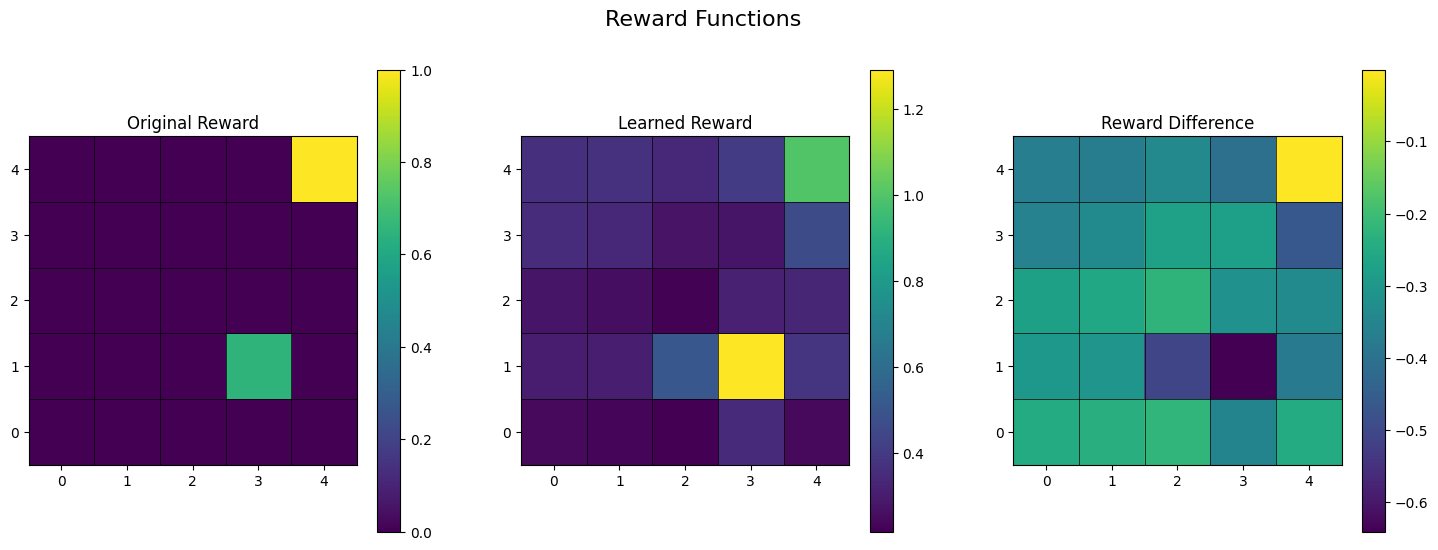

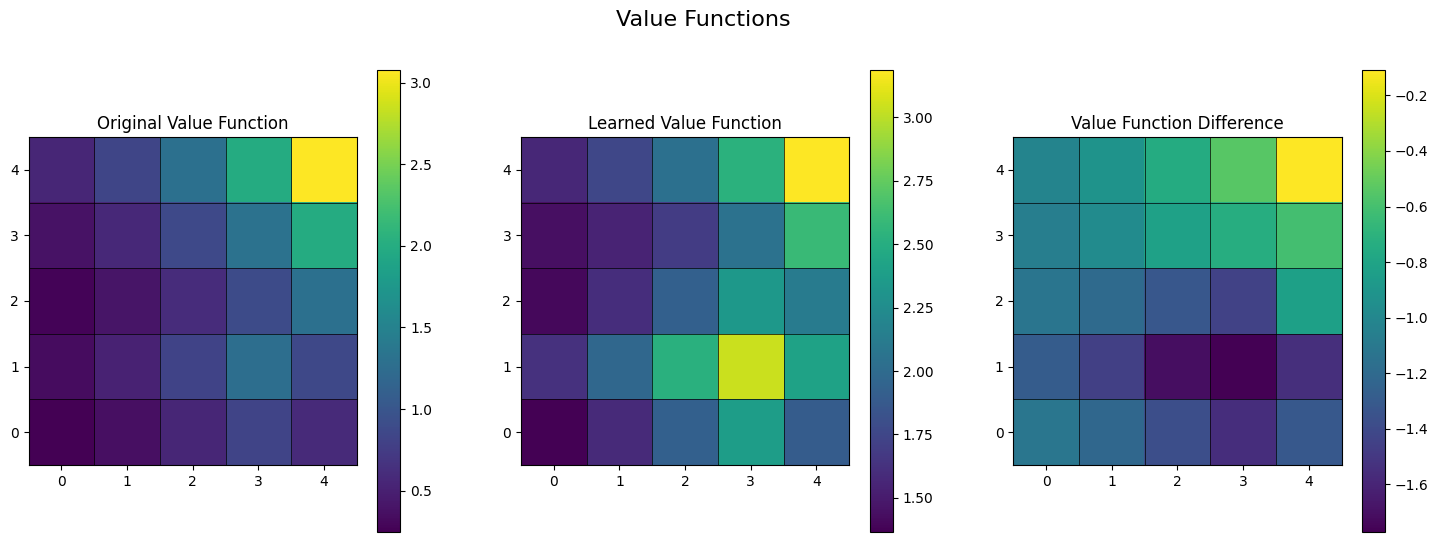

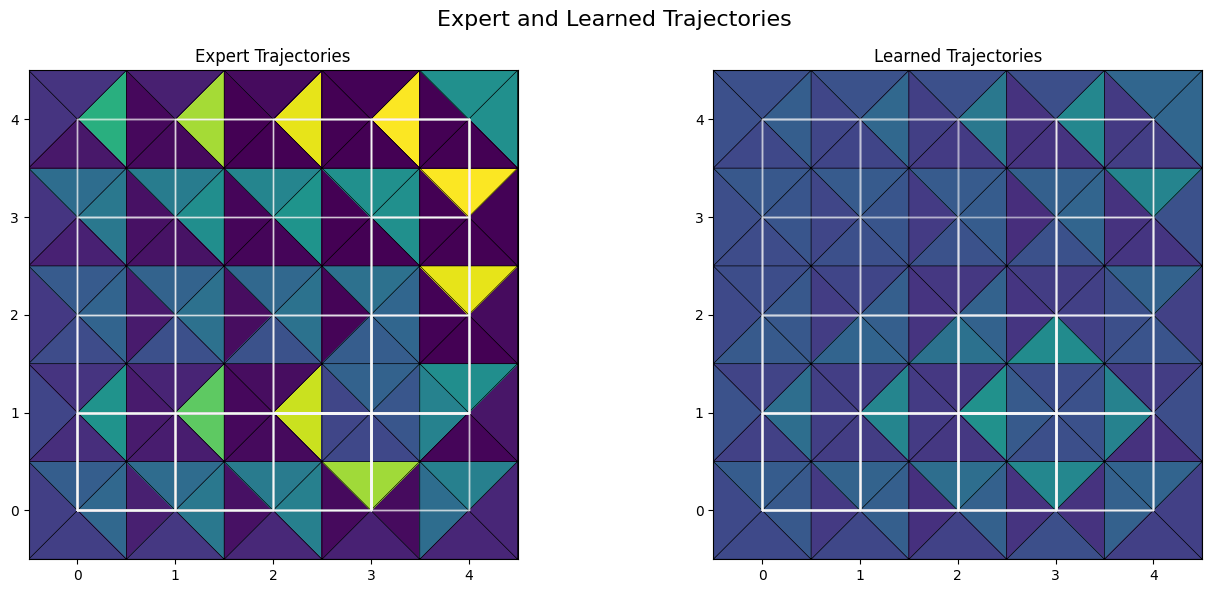


Original Reward Function:
[[0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.65 0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.  ]]

Learned Reward Function:
[[0.25 0.24 0.22 0.35 0.25]
 [0.3  0.31 0.51 1.29 0.38]
 [0.28 0.26 0.23 0.32 0.33]
 [0.36 0.34 0.27 0.28 0.46]
 [0.37 0.37 0.34 0.4  1.  ]]

Difference in Reward Function:
[[-0.25 -0.24 -0.22 -0.35 -0.25]
 [-0.3  -0.31 -0.51 -0.64 -0.38]
 [-0.28 -0.26 -0.23 -0.32 -0.33]
 [-0.36 -0.34 -0.27 -0.28 -0.46]
 [-0.37 -0.37 -0.34 -0.4  -0.  ]]

Original Value Function:
[[0.25 0.37 0.55 0.82 0.58]
 [0.34 0.52 0.81 1.27 0.86]
 [0.28 0.41 0.6  0.89 1.29]
 [0.38 0.57 0.87 1.32 1.99]
 [0.55 0.84 1.29 1.99 3.08]]

Learned Value Function:
[[1.37 1.58 1.92 2.38 1.9 ]
 [1.63 1.98 2.52 3.04 2.41]
 [1.4  1.6  1.92 2.34 2.12]
 [1.44 1.54 1.69 2.05 2.6 ]
 [1.57 1.75 2.04 2.53 3.19]]

Difference in Value Function:
[[-1.12 -1.22 -1.37 -1.55 -1.32]
 [-1.29 -1.45 -1.71 -1.77 -1.55]
 [-1.12 -1.2  -1.32 -1.44 -0.83]
 [-1

In [10]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.tri as tri

class GridWorld:
    def __init__(self, size):
        self.size = size
        self.actions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        self.n_states = size**2
        self.n_actions = len(self.actions)
        self.p_transition = self._transition_prob_table()
    def state_index_to_point(self, state):
        return state % self.size, state // self.size
    def state_point_to_index(self, state):
        return state[1] * self.size + state[0]
    def state_point_to_index_clipped(self, state):
        s = (max(0, min(self.size - 1, state[0])), max(0, min(self.size - 1, state[1])))
        return self.state_point_to_index(s)
    def state_index_transition(self, s, a):
        s = self.state_index_to_point(s)
        s = s[0] + self.actions[a][0], s[1] + self.actions[a][1]
        return self.state_point_to_index_clipped(s)
    def _transition_prob_table(self):
        table = np.zeros((self.n_states, self.n_states, self.n_actions))
        s1, s2, a = range(self.n_states), range(self.n_states), range(self.n_actions)
        for s_from, s_to, a in product(s1, s2, a):
            table[s_from, s_to, a] = self._transition_prob(s_from, s_to, a)
        return table
    def _transition_prob(self, s_from, s_to, a):
        fx, fy = self.state_index_to_point(s_from)
        tx, ty = self.state_index_to_point(s_to)
        ax, ay = self.actions[a]
        if fx + ax == tx and fy + ay == ty:
            return 1.0
        if fx == tx and fy == ty:
            if not 0 <= fx + ax < self.size or not 0 <= fy + ay < self.size:
                return 1.0
        return 0.0
    def __repr__(self):
        return "GridWorld(size={})".format(self.size)

class IcyGridWorld(GridWorld):
    def __init__(self, size, p_slip=0.2):
        self.p_slip = p_slip
        super().__init__(size)
    def _transition_prob(self, s_from, s_to, a):
        fx, fy = self.state_index_to_point(s_from)
        tx, ty = self.state_index_to_point(s_to)
        ax, ay = self.actions[a]
        if fx + ax == tx and fy + ay == ty:
            return 1.0 - self.p_slip + self.p_slip / self.n_actions
        if abs(fx - tx) + abs(fy - ty) == 1:
            return self.p_slip / self.n_actions
        if fx == tx and fy == ty:
            if not 0 <= fx + ax < self.size or not 0 <= fy + ay < self.size:
                if not 0 < fx < self.size - 1 and not 0 < fy < self.size - 1:
                    return 1.0 - self.p_slip + 2.0 * self.p_slip / self.n_actions
                return 1.0 - self.p_slip + self.p_slip / self.n_actions
            if not 0 < fx < self.size - 1 and not 0 < fy < self.size - 1:
                return 2.0 * self.p_slip / self.n_actions
            if not 0 < fx < self.size - 1 or not 0 < fy < self.size - 1:
                return self.p_slip / self.n_actions
            return 0.0
        return 0.0
    def __repr__(self):
        return "IcyGridWorld(size={}, p_slip={})".format(self.size, self.p_slip)

def state_features(world):
    return np.identity(world.n_states)

def coordinate_features(world):
    features = np.zeros((world.n_states, world.size))
    for s in range(world.n_states):
        x, y = world.state_index_to_point(s)
        features[s, x] += 1
        features[s, y] += 1
    return features

def feature_expectation_from_trajectories(features, trajectories):
    n_states, n_features = features.shape
    fe = np.zeros(n_features)
    for t in trajectories:
        for s in t.states():
            fe += features[s, :]
    return fe / len(trajectories)

def initial_probabilities_from_trajectories(n_states, trajectories):
    p = np.zeros(n_states)
    for t in trajectories:
        p[t.transitions()[0][0]] += 1.0
    return p / len(trajectories)

def expected_svf_from_policy(p_transition, p_initial, terminal, p_action, eps=1e-5):
    n_states, _, n_actions = p_transition.shape
    p_transition = np.copy(p_transition)
    p_transition[terminal, :, :] = 0.0
    p_transition = [np.array(p_transition[:, :, a]) for a in range(n_actions)]
    d = np.zeros(n_states)
    delta = np.inf
    while delta > eps:
        d_ = [p_transition[a].T.dot(p_action[:, a] * d) for a in range(n_actions)]
        d_ = p_initial + np.array(d_).sum(axis=0)
        delta, d = np.max(np.abs(d_ - d)), d_
    return d

def local_action_probabilities(p_transition, terminal, reward):
    n_states, _, n_actions = p_transition.shape
    er = np.exp(reward)
    p = [np.array(p_transition[:, :, a]) for a in range(n_actions)]
    zs = np.zeros(n_states)
    zs[terminal] = 1.0
    for _ in range(2 * n_states):
        za = np.array([er * p[a].dot(zs) for a in range(n_actions)]).T
        zs = za.sum(axis=1)
    return za / zs[:, None]

def compute_expected_svf(p_transition, p_initial, terminal, reward, eps=1e-5):
    p_action = local_action_probabilities(p_transition, terminal, reward)
    return expected_svf_from_policy(p_transition, p_initial, terminal, p_action, eps)

def irl(p_transition, features, terminal, trajectories, optim, init, eps=1e-4, eps_esvf=1e-5):
    n_states, _, n_actions = p_transition.shape
    _, n_features = features.shape
    e_features = feature_expectation_from_trajectories(features, trajectories)
    p_initial = initial_probabilities_from_trajectories(n_states, trajectories)
    theta = init(n_features)
    delta = np.inf
    optim.reset(theta)
    while delta > eps:
        theta_old = theta.copy()
        reward = features.dot(theta)
        e_svf = compute_expected_svf(p_transition, p_initial, terminal, reward, eps_esvf)
        grad = e_features - features.T.dot(e_svf)
        optim.step(grad)
        delta = np.max(np.abs(theta_old - theta))
    return features.dot(theta)

def softmax(x1, x2):
    x_max = np.maximum(x1, x2)
    x_min = np.minimum(x1, x2)
    return x_max + np.log(1.0 + np.exp(x_min - x_max))

def local_causal_action_probabilities(p_transition, terminal, reward, discount, eps=1e-5):
    n_states, _, n_actions = p_transition.shape
    if len(terminal) == n_states:
        reward_terminal = np.array(terminal, dtype=float)
    else:
        reward_terminal = -np.inf * np.ones(n_states)
        reward_terminal[terminal] = 0.0
    p = [np.array(p_transition[:, :, a]) for a in range(n_actions)]
    v = -1e200 * np.ones(n_states)
    delta = np.inf
    while delta > eps:
        v_old = v
        q = np.array([reward + discount * p[a].dot(v_old) for a in range(n_actions)]).T
        v = reward_terminal
        for a in range(n_actions):
            v = softmax(v, q[:, a])
        v = np.array(v, dtype=float)
        delta = np.max(np.abs(v - v_old))
    return np.exp(q - v[:, None])

def compute_expected_causal_svf(p_transition, p_initial, terminal, reward, discount,
                                eps_lap=1e-5, eps_svf=1e-5):
    p_action = local_causal_action_probabilities(p_transition, terminal, reward, discount, eps_lap)
    return expected_svf_from_policy(p_transition, p_initial, terminal, p_action, eps_svf)

def irl_causal(p_transition, features, terminal, trajectories, optim, init, discount,
               eps=1e-4, eps_svf=1e-5, eps_lap=1e-5):
    n_states, _, n_actions = p_transition.shape
    _, n_features = features.shape
    e_features = feature_expectation_from_trajectories(features, trajectories)
    p_initial = initial_probabilities_from_trajectories(n_states, trajectories)
    theta = init(n_features)
    delta = np.inf
    optim.reset(theta)
    while delta > eps:
        theta_old = theta.copy()
        reward = features.dot(theta)
        e_svf = compute_expected_causal_svf(p_transition, p_initial, terminal, reward, discount,
                                            eps_lap, eps_svf)
        grad = e_features - features.T.dot(e_svf)
        optim.step(grad)
        delta = np.max(np.abs(theta_old - theta))
    return features.dot(theta)

class Optimizer:
    def __init__(self):
        self.parameters = None
    def reset(self, parameters):
        self.parameters = parameters
    def step(self, grad, *args, **kwargs):
        raise NotImplementedError
    def normalize_grad(self, ord=None):
        return NormalizeGrad(self, ord)

class Sga(Optimizer):
    def __init__(self, lr):
        super().__init__()
        self.lr = lr
        self.k = 0
    def reset(self, parameters):
        super().reset(parameters)
        self.k = 0
    def step(self, grad, *args, **kwargs):
        lr = self.lr if not callable(self.lr) else self.lr(self.k)
        self.k += 1
        self.parameters += lr * grad

class ExpSga(Optimizer):
    def __init__(self, lr, normalize=False):
        super().__init__()
        self.lr = lr
        self.normalize = normalize
        self.k = 0
    def reset(self, parameters):
        super().reset(parameters)
        self.k = 0
    def step(self, grad, *args, **kwargs):
        lr = self.lr if not callable(self.lr) else self.lr(self.k)
        self.k += 1
        self.parameters *= np.exp(lr * grad)
        if self.normalize:
            self.parameters /= self.parameters.sum()

class NormalizeGrad(Optimizer):
    def __init__(self, opt, ord=None):
        super().__init__()
        self.opt = opt
        self.ord = ord
    def reset(self, parameters):
        super().reset(parameters)
        self.opt.reset(parameters)
    def step(self, grad, *args, **kwargs):
        return self.opt.step(grad / np.linalg.norm(grad, self.ord), *args, **kwargs)

def linear_decay(lr0=0.2, decay_rate=1.0, decay_steps=1):
    def _lr(k):
        return lr0 / (1.0 + decay_rate * np.floor(k / decay_steps))
    return _lr

def power_decay(lr0=0.2, decay_rate=1.0, decay_steps=1, power=2):
    def _lr(k):
        return lr0 / (decay_rate * np.floor(k / decay_steps) + 1.0)**power
    return _lr

def exponential_decay(lr0=0.2, decay_rate=0.5, decay_steps=1):
    def _lr(k):
        return lr0 * np.exp(-decay_rate * np.floor(k / decay_steps))
    return _lr

class Initializer:
    def __init__(self):
        pass
    def initialize(self, shape):
        raise NotImplementedError
    def __call__(self, shape):
        return self.initialize(shape)

class Uniform(Initializer):
    def __init__(self, low=0.0, high=1.0):
        super().__init__()
        self.low = low
        self.high = high
    def initialize(self, shape):
        return np.random.uniform(size=shape, low=self.low, high=self.high)

class Constant(Initializer):
    def __init__(self, value=1.0):
        super().__init__()
        self.value = value
    def initialize(self, shape):
        if callable(self.value):
            return np.ones(shape) * self.value(shape)
        else:
            return np.ones(shape) * self.value

def plot_transition_probabilities(ax, world, border=None, **kwargs):
    xy = [(x - 0.5, y - 0.5) for y, x in product(range(world.size + 1), range(world.size + 1))]
    xy += [(x, y) for y, x in product(range(world.size), range(world.size))]
    t, v = [], []
    for sy, sx in product(range(world.size), range(world.size)):
        state = world.state_point_to_index((sx, sy))
        state_r = world.state_point_to_index_clipped((sx + 1, sy))
        state_l = world.state_point_to_index_clipped((sx - 1, sy))
        state_t = world.state_point_to_index_clipped((sx, sy + 1))
        state_b = world.state_point_to_index_clipped((sx, sy - 1))
        bl, br = sy * (world.size + 1) + sx, sy * (world.size + 1) + sx + 1
        tl, tr = (sy + 1) * (world.size + 1) + sx, (sy + 1) * (world.size + 1) + sx + 1
        cc = (world.size + 1)**2 + sy * world.size + sx
        t += [(tr, cc, br)]
        t += [(tl, bl, cc)]
        t += [(tl, cc, tr)]
        t += [(bl, br, cc)]
        v += [world.p_transition[state, state_r, 0]]
        v += [world.p_transition[state, state_l, 1]]
        v += [world.p_transition[state, state_t, 2]]
        v += [world.p_transition[state, state_b, 3]]
    x, y = zip(*xy)
    x, y = np.array(x), np.array(y)
    t, v = np.array(t), np.array(v)
    ax.set_aspect('equal')
    ax.set_xticks(range(world.size))
    ax.set_yticks(range(world.size))
    ax.set_xlim(-0.5, world.size - 0.5)
    ax.set_ylim(-0.5, world.size - 0.5)
    p = ax.tripcolor(x, y, t, facecolors=v, vmin=0.0, vmax=1.0, **kwargs)
    if border is not None:
        ax.triplot(x, y, t, **border)
    return p

def plot_state_values(ax, world, values, border, **kwargs):
    p = ax.imshow(np.reshape(values, (world.size, world.size)), origin='lower', **kwargs)
    if border is not None:
        for i in range(0, world.size + 1):
            ax.plot([i - 0.5, i - 0.5], [-0.5, world.size - 0.5], **border, label=None)
            ax.plot([-0.5, world.size - 0.5], [i - 0.5, i - 0.5], **border, label=None)
    return p

def plot_deterministic_policy(ax, world, policy, **kwargs):
    arrow_direction = [(0.33, 0), (-0.33, 0), (0, 0.33), (0, -0.33)]
    for state in range(world.n_states):
        cx, cy = world.state_index_to_point(state)
        dx, dy = arrow_direction[policy[state]]
        ax.arrow(cx - 0.5 * dx, cy - 0.5 * dy, dx, dy, head_width=0.1, **kwargs)

def plot_stochastic_policy(ax, world, policy, border=None, **kwargs):
    xy = [(x - 0.5, y - 0.5) for y, x in product(range(world.size + 1), range(world.size + 1))]
    xy += [(x, y) for y, x in product(range(world.size), range(world.size))]
    t, v = [], []
    for sy, sx in product(range(world.size), range(world.size)):
        state = world.state_point_to_index((sx, sy))
        bl, br = sy * (world.size + 1) + sx, sy * (world.size + 1) + sx + 1
        tl, tr = (sy + 1) * (world.size + 1) + sx, (sy + 1) * (world.size + 1) + sx + 1
        cc = (world.size + 1)**2 + sy * world.size + sx
        t += [(tr, cc, br)]
        t += [(tl, bl, cc)]
        t += [(tl, cc, tr)]
        t += [(bl, br, cc)]
        v += [policy[state, 0]]
        v += [policy[state, 1]]
        v += [policy[state, 2]]
        v += [policy[state, 3]]
    x, y = zip(*xy)
    x, y = np.array(x), np.array(y)
    t, v = np.array(t), np.array(v)
    ax.set_aspect('equal')
    ax.set_xticks(range(world.size))
    ax.set_yticks(range(world.size))
    ax.set_xlim(-0.5, world.size - 0.5)
    ax.set_ylim(-0.5, world.size - 0.5)
    p = ax.tripcolor(x, y, t, facecolors=v, vmin=0.0, vmax=1.0, **kwargs)
    if border is not None:
        ax.triplot(x, y, t, **border)
    return p

def plot_trajectory(ax, world, trajectory, **kwargs):
    xy = [world.state_index_to_point(s) for s in trajectory.states()]
    x, y = zip(*xy)
    return ax.plot(x, y, **kwargs)

def value_iteration(p, reward, discount, eps=1e-3):
    n_states, _, n_actions = p.shape
    v = np.zeros(n_states)
    p = [np.matrix(p[:, :, a]) for a in range(n_actions)]
    delta = np.inf
    while delta > eps:
        v_old = v
        q = discount * np.array([p[a] @ v for a in range(n_actions)])
        v = reward + np.max(q, axis=0)[0]
        delta = np.max(np.abs(v_old - v))
    return v

def stochastic_value_iteration(p, reward, discount, eps=1e-3):
    n_states, _, n_actions = p.shape
    v = np.zeros(n_states)
    p = [np.matrix(p[:, :, a]) for a in range(n_actions)]
    delta = np.inf
    while delta > eps:
        v_old = v
        q = discount * np.array([p[a] @ v for a in range(n_actions)])
        v = reward + np.average(q, axis=0)[0]
        delta = np.max(np.abs(v_old - v))
    return v

def optimal_policy_from_value(world, value):
    policy = np.array([
        np.argmax([value[world.state_index_transition(s, a)] for a in range(world.n_actions)])
        for s in range(world.n_states)
    ])
    return policy

def optimal_policy(world, reward, discount, eps=1e-3):
    value = value_iteration(world.p_transition, reward, discount, eps)
    return optimal_policy_from_value(world, value)

def stochastic_policy_from_value(world, value, w=lambda x: x):
    value = np.exp(value)
    q = np.array([
        np.array([w(value[world.state_index_transition(s, a)]) for a in range(world.n_actions)])
        for s in range(world.n_states)
    ])
    return q / np.sum(q, axis=1)[:, None]

from itertools import chain

class Trajectory:
    def __init__(self, transitions):
        self._t = transitions
    def transitions(self):
        return self._t
    def states(self):
        return map(lambda x: x[0], chain(self._t, [(self._t[-1][2], 0, 0)]))
    def __repr__(self):
        return "Trajectory({})".format(repr(self._t))
    def __str__(self):
        return "{}".format(self._t)

def generate_trajectory(world, policy, start, final):
    state = start
    trajectory = []
    while state not in final:
        action = policy(state)
        next_s = range(world.n_states)
        next_p = world.p_transition[state, :, action]
        next_state = np.random.choice(next_s, p=next_p)
        trajectory += [(state, action, next_state)]
        state = next_state
    return Trajectory(trajectory)

def generate_trajectories(n, world, policy, start, final):
    start_states = np.atleast_1d(start)
    def _generate_one():
        if len(start_states) == world.n_states:
            s = np.random.choice(range(world.n_states), p=start_states)
        else:
            s = np.random.choice(start_states)
        return generate_trajectory(world, policy, s, final)
    return (_generate_one() for _ in range(n))

def policy_adapter(policy):
    return lambda state: policy[state]

def stochastic_policy_adapter(policy):
    return lambda state: np.random.choice([*range(policy.shape[1])], p=policy[state, :])

def setup_mdp():
    world = IcyGridWorld(size=5, p_slip=0.2)
    reward = np.zeros(world.n_states)
    reward[-1] = 1.0
    reward[8] = 0.65
    terminal = [24]
    return world, reward, terminal

def generate_expert_trajectories(world, reward, terminal):
    n_trajectories = 200
    discount = 0.7
    weighting = lambda x: x**5
    initial = np.zeros(world.n_states)
    initial[0] = 1.0
    value = value_iteration(world.p_transition, reward, discount)
    policy = stochastic_policy_from_value(world, value, w=weighting)
    policy_exec = stochastic_policy_adapter(policy)
    tjs = list(generate_trajectories(n_trajectories, world, policy_exec, initial, terminal))
    return tjs, policy

def maxent(world, terminal, trajectories):
    features = state_features(world)
    init = Constant(1.0)
    optim = ExpSga(lr=linear_decay(lr0=0.2))
    reward = irl(world.p_transition, features, terminal, trajectories, optim, init)
    return reward

def maxent_causal(world, terminal, trajectories, discount=0.7):
    features = state_features(world)
    init = Constant(1.0)
    optim = ExpSga(lr=linear_decay(lr0=0.2))
    reward = irl_causal(world.p_transition, features, terminal, trajectories, optim, init, discount)
    return reward

import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.tri as tri

# (All the classes and functions remain the same as in your original code)
# Please ensure all previous definitions are included here

def main():
    style = {'border': {'color': 'black', 'linewidth': 0.5}}

    # Set up the MDP
    world, reward, terminal = setup_mdp()

    # Generate expert trajectories
    trajectories, expert_policy = generate_expert_trajectories(world, reward, terminal)

    # Learn reward function using MaxEnt
    reward_maxent = maxent(world, terminal, trajectories)

    # Compute the difference between original and learned reward
    reward_diff = reward - reward_maxent

    # Compute the value function for the original reward
    discount = 0.7
    value_original = value_iteration(world.p_transition, reward, discount)

    # Compute the value function for the learned reward
    value_maxent = value_iteration(world.p_transition, reward_maxent, discount)

    # Compute the difference between the value functions
    value_diff = value_original - value_maxent

    # Plot the original and learned reward functions and their difference
    fig1, axes1 = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    fig1.suptitle('Reward Functions', fontsize=16)

    p = plot_state_values(axes1[0], world, reward, **style)
    axes1[0].set_title('Original Reward')
    fig1.colorbar(p, ax=axes1[0])

    p = plot_state_values(axes1[1], world, reward_maxent, **style)
    axes1[1].set_title('Learned Reward')
    fig1.colorbar(p, ax=axes1[1])

    p = plot_state_values(axes1[2], world, reward_diff, **style)
    axes1[2].set_title('Reward Difference')
    fig1.colorbar(p, ax=axes1[2])

    # Plot the value functions
    fig2, axes2 = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    fig2.suptitle('Value Functions', fontsize=16)

    p = plot_state_values(axes2[0], world, value_original, **style)
    axes2[0].set_title('Original Value Function')
    fig2.colorbar(p, ax=axes2[0])

    p = plot_state_values(axes2[1], world, value_maxent, **style)
    axes2[1].set_title('Learned Value Function')
    fig2.colorbar(p, ax=axes2[1])

    p = plot_state_values(axes2[2], world, value_diff, **style)
    axes2[2].set_title('Value Function Difference')
    fig2.colorbar(p, ax=axes2[2])

    # Generate trajectories from the learned policy
    policy_learned = stochastic_policy_from_value(world, value_maxent)
    policy_learned_exec = stochastic_policy_adapter(policy_learned)
    n_trajectories = 50
    initial = np.zeros(world.n_states)
    initial[0] = 1.0
    learned_trajectories = list(generate_trajectories(n_trajectories, world, policy_learned_exec, initial, terminal))

    # Plot expert and learned trajectories
    fig3, axes3 = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    fig3.suptitle('Expert and Learned Trajectories', fontsize=16)

    axes3[0].set_title('Expert Trajectories')
    plot_stochastic_policy(axes3[0], world, expert_policy, **style)
    for t in trajectories:
        plot_trajectory(axes3[0], world, t, lw=1, color='white', alpha=0.1)

    axes3[1].set_title('Learned Trajectories')
    plot_stochastic_policy(axes3[1], world, policy_learned, **style)
    for t in learned_trajectories:
        plot_trajectory(axes3[1], world, t, lw=1, color='white', alpha=0.1)

    plt.tight_layout()
    plt.show()

    # Print the reward functions and value functions in tabular form
    np.set_printoptions(precision=2, suppress=True)

    print("\nOriginal Reward Function:")
    print(np.reshape(reward, (world.size, world.size)))

    print("\nLearned Reward Function:")
    print(np.reshape(reward_maxent, (world.size, world.size)))

    print("\nDifference in Reward Function:")
    print(np.reshape(reward_diff, (world.size, world.size)))

    print("\nOriginal Value Function:")
    print(np.reshape(value_original, (world.size, world.size)))

    print("\nLearned Value Function:")
    print(np.reshape(value_maxent, (world.size, world.size)))

    print("\nDifference in Value Function:")
    print(np.reshape(value_diff, (world.size, world.size)))

if __name__ == '__main__':
    main()

In [2]:
import numpy as np
import random
from collections import defaultdict
from scipy.optimize import minimize
from scipy.special import logsumexp
from tqdm import tqdm

np.random.seed(42)
random.seed(42)

#####################################
# Hyperparameters
#####################################
TRAJ_LENGTH = 10
DATASET_SIZE = 10

#####################################
# Environment Setup (3-feature grid)
#####################################
class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.features = np.zeros((size, size))
        self.payoffs = {}
        self.define_features()
        self.states = [(x, y) for x in range(size) for y in range(size)]
        self.num_states = len(self.states)
        self.state_indices = {state: idx for idx, state in enumerate(self.states)}

        # Actions: up, down, left, right
        self.actions = ['up', 'down', 'left', 'right']
        self.num_actions = len(self.actions)

    def define_features(self):
        for x in range(self.size):
            for y in range(self.size):
                if (x + y) % 3 == 0:
                    self.features[x, y] = 1  # Feature 1
                elif (x + y) % 3 == 1:
                    self.features[x, y] = 2  # Feature 2
                else:
                    self.features[x, y] = 3  # Feature 3
        self.payoffs = {1: 1, 2: 0.95, 3: -1}

    def get_payoff(self, position):
        x, y = position
        feature = self.features[x, y]
        return self.payoffs[feature]

#####################################
# Agent (NFXP style)
#####################################
class Agent:
    def __init__(self, gridworld, discount_factor=0.95):
        self.gridworld = gridworld
        self.discount_factor = discount_factor
        self.actions = self.gridworld.actions
        self.num_actions = len(self.actions)
        self.states = self.gridworld.states
        self.num_states = len(self.states)
        self.state_indices = self.gridworld.state_indices

    def move(self, position, action):
        x, y = position
        if action == 'up' and x > 0:
            x -= 1
        elif action == 'down' and x < self.gridworld.size - 1:
            x += 1
        elif action == 'left' and y > 0:
            y -= 1
        elif action == 'right' and y < self.gridworld.size - 1:
            y += 1
        return (x, y)

    def value_iteration(self, max_iter=1000, tol=1e-7):
        V = np.zeros(self.num_states)
        for iteration in range(max_iter):
            V_prev = V.copy()
            for idx, state in enumerate(self.states):
                action_values = []
                for action in self.actions:
                    new_state = self.move(state, action)
                    reward = self.gridworld.get_payoff(new_state)
                    new_state_idx = self.state_indices[new_state]
                    Q_value = reward + self.discount_factor * V_prev[new_state_idx]
                    action_values.append(Q_value)
                V[idx] = logsumexp(action_values)
            if np.max(np.abs(V - V_prev)) < tol:
                break
        return V

    def get_action_probabilities(self, state, V):
        action_values = []
        for action in self.actions:
            new_state = self.move(state, action)
            reward = self.gridworld.get_payoff(new_state)
            new_state_idx = self.state_indices[new_state]
            Q_value = reward + self.discount_factor * V[new_state_idx]
            action_values.append(Q_value)
        log_probs = action_values - logsumexp(action_values)
        probs = np.exp(log_probs)
        return probs

#####################################
# Data Generation (Expert Trajectories)
#####################################
def generate_expert_data(agent, nt, traj_length):
    # True parameters
    agent.gridworld.payoffs = {1: 1, 2: 0.95, 3: -1}
    V_true = agent.value_iteration()
    trajectories = []
    for _ in tqdm(range(nt), desc="Generating Expert Trajectories"):
        start_position = (random.randint(0, agent.gridworld.size - 1), random.randint(0, agent.gridworld.size - 1))
        trajectory = []
        position = start_position
        for step in range(traj_length):
            probs = agent.get_action_probabilities(position, V_true)
            action = np.random.choice(agent.actions, p=probs)
            new_position = agent.move(position, action)
            # Store (s,a,s') as indices
            s = agent.state_indices[position]
            a = agent.actions.index(action)
            s_next = agent.state_indices[new_position]
            trajectory.append((s, a, s_next))
            position = new_position
        trajectories.append(trajectory)
    return trajectories

#####################################
# NFXP Parameter Estimation
#####################################
def nfxp_log_likelihood(params, agent, trajectories):
    agent.gridworld.payoffs = {1: params[0], 2: params[1], 3: params[2]}
    V = agent.value_iteration()
    log_likelihood = 0
    for trajectory in trajectories:
        for (s, a, s_next) in trajectory:
            # Compute action probabilities at state s
            state = agent.states[s]
            probs = agent.get_action_probabilities(state, V)
            log_likelihood += np.log(probs[a] + 1e-12)
    return -log_likelihood

def estimate_nfxp(agent, trajectories):
    initial_params = [0.5, 0.5, -0.5]
    bounds = [(-2, 2), (-2, 2), (-2, 2)]
    result = minimize(
        nfxp_log_likelihood,
        initial_params,
        args=(agent, trajectories),
        bounds=bounds,
        method='L-BFGS-B',
        options={'maxiter': 500, 'disp': False}
    )
    return result.x

#####################################
# MaxEnt IRL
#####################################
def state_features_3d(gridworld):
    # 3 features: one-hot for the feature present
    F = np.zeros((gridworld.num_states, 3))
    for s, state in enumerate(gridworld.states):
        x, y = state
        f = gridworld.features[x, y]
        if f == 1:
            F[s, :] = [1, 0, 0]
        elif f == 2:
            F[s, :] = [0, 1, 0]
        else:
            F[s, :] = [0, 0, 1]
    return F

def feature_expectation_from_trajectories(features, trajectories):
    n_features = features.shape[1]
    fe = np.zeros(n_features)
    for traj in trajectories:
        for (s, a, s_next) in traj:
            fe += features[s, :]
    fe /= len(trajectories)
    return fe

def initial_probabilities_from_trajectories(num_states, trajectories):
    p = np.zeros(num_states)
    for traj in trajectories:
        p[traj[0][0]] += 1
    p = p / len(trajectories)
    return p

def build_transition_matrix(agent):
    # p_transition: shape (num_states, num_states, num_actions)
    nS = agent.num_states
    nA = agent.num_actions
    p_transition = np.zeros((nS, nS, nA))
    for s, state in enumerate(agent.states):
        for a, action in enumerate(agent.actions):
            next_state = agent.move(state, action)
            ns = agent.state_indices[next_state]
            p_transition[s, ns, a] = 1.0
    return p_transition

def expected_svf_from_policy(p_transition, p_initial, p_action, eps=1e-5):
    d = p_initial.copy()
    while True:
        d_next = p_initial.copy()
        for a in range(p_action.shape[1]):
            d_next += p_transition[:, :, a].T.dot(p_action[:, a] * d)
        if np.max(np.abs(d_next - d)) < eps:
            break
        d = d_next
    return d

def local_action_probabilities(reward, p_transition):
    # Use softmax over immediate reward for simplicity
    n_states, _, n_actions = p_transition.shape
    # p_action(s,a) = exp(r(s)) / sum_a exp(r(s)) since no action-differentiation in this simplified setup
    # This is a simplification of maxent. A more refined approach would iterate to find consistent p_action.
    # For demonstration: same probability distribution over actions (since reward doesn't depend on action)?
    # Actually, in MaxEnt IRL, normally you solve a more complex system. 
    # We'll just do: p_action(s,a) = exp(r(s)) / sum_{a} exp(r(s)) = 1/n_actions (no action distinction)
    # This won't give meaningful action distinctions, but let's do a quick iterative approach.

    # Attempt a tiny refinement:
    # We'll assume each action leads deterministically to a next state with that same state's reward:
    # Q(s,a)=r(s_next), p_action(s,a)=exp(Q(s,a))/sum_a exp(Q(s,a))

    p_action = np.zeros((n_states, n_actions))
    for s in range(n_states):
        q = []
        for a in range(n_actions):
            # find next state reward
            ns = np.where(p_transition[s,:,a]==1)[0][0]
            q.append(reward[ns])
        q = np.array(q)
        p_action[s, :] = np.exp(q - logsumexp(q))
    return p_action

def compute_expected_svf(p_transition, p_initial, reward):
    p_action = local_action_probabilities(reward, p_transition)
    d = expected_svf_from_policy(p_transition, p_initial, p_action)
    return d

class SgaOptimizer:
    def __init__(self, lr=0.1):
        self.lr = lr
    def reset(self, parameters):
        self.parameters = parameters
    def step(self, grad):
        self.parameters += self.lr * grad

def maxent_irl(p_transition, features, trajectories, lr=0.1, eps=1e-4):
    e_features = feature_expectation_from_trajectories(features, trajectories)
    p_initial = initial_probabilities_from_trajectories(features.shape[0], trajectories)
    n_features = features.shape[1]
    theta = np.zeros(n_features)
    optim = SgaOptimizer(lr=lr)
    optim.reset(theta)

    delta = np.inf
    iteration = 0
    print("Iter\tLoss\t\tDelta")
    while delta > eps:
        old_theta = optim.parameters.copy()
        reward = features.dot(optim.parameters)
        e_svf = compute_expected_svf(p_transition, p_initial, reward)
        grad = e_features - features.T.dot(e_svf)
        optim.step(grad)
        delta = np.max(np.abs(old_theta - optim.parameters))

        # Compute loss
        loss = np.sum((e_features - features.T.dot(e_svf)) ** 2)

        # Print iteration details
        print(f"{iteration}\t{loss:.6f}\t{delta:.6f}")

        iteration += 1
        if iteration >= 10000:  # Safety limit to prevent infinite loops
            print("Max iterations reached.")
            break

    return optim.parameters


#####################################
# Main
#####################################
if __name__ == "__main__":
    # Create environment and agent
    gw = GridWorld(size=5)
    agent = Agent(gw, discount_factor=0.95)

    # Generate expert data
    trajectories = generate_expert_data(agent, DATASET_SIZE, TRAJ_LENGTH)

    # Estimate parameters using NFXP
    print("\nEstimating parameters via NFXP...")
    nfxp_estimates = estimate_nfxp(agent, trajectories)

    # Run MaxEnt IRL
    print("\nRunning MaxEnt IRL...")
    features = state_features_3d(gw)
    p_transition = build_transition_matrix(agent)
    maxent_estimates = maxent_irl(p_transition, features, trajectories, lr=0.1, eps=1e-4)

    # True parameters:
    true_params = np.array([1.0, 0.95, -1.0])

    print("\nResults:")
    print("True parameters:   ", true_params)
    print("NFXP estimates:    ", nfxp_estimates)
    print("MaxEnt estimates:  ", maxent_estimates)
    print("NFXP errors:       ", nfxp_estimates - true_params)
    print("MaxEnt errors:     ", maxent_estimates - true_params)


Generating Expert Trajectories: 100%|██████████| 10/10 [00:00<00:00, 3033.20it/s]



Estimating parameters via NFXP...


KeyboardInterrupt: 

In [20]:
import numpy as np
import random

# IcyGridWorld class
class IcyGridWorld:
    def __init__(self, size=3, p_slip=0.5):  # Increased p_slip to 0.5
        self.size = size
        self.p_slip = p_slip
        self.actions = [(1, 0), (-1, 0), (0, 1), (0, -1)]  # Down, Up, Right, Left
        self.n_states = size * size
        self.n_actions = len(self.actions)

    def state_index_to_point(self, state):
        return state % self.size, state // self.size  # Convert state index to (x, y)

    def state_point_to_index(self, state):
        return state[1] * self.size + state[0]  # Convert (x, y) to state index

    def move(self, s, a):
        x, y = self.state_index_to_point(s)
        dx, dy = self.actions[a]
        nx, ny = x + dx, y + dy
        # If the move goes out of bounds, stay in the same cell
        if nx < 0 or nx >= self.size or ny < 0 or ny >= self.size:
            return s
        return self.state_point_to_index((nx, ny))

    def step(self, state, action):
        if random.random() < self.p_slip:
            # Slip to a random action
            action = random.choice(range(self.n_actions))
        return self.move(state, action)

# 1. Setup: Define Features
def one_hot_encoding(world):
    features = np.eye(world.n_states)  # Create an identity matrix for one-hot encoding
    return features

# Generate expert trajectories
def generate_expert_trajectories(world, features, true_weights, num_trajectories=50, max_steps=20):
    trajectories = []
    rewards = features.dot(true_weights)
    policy = compute_policy(world, features, true_weights)  # Use true weights to simulate expert policy
    for _ in range(num_trajectories):
        state = random.randint(0, world.n_states - 1)  # Random starting state
        trajectory = []
        for _ in range(max_steps):
            action = np.random.choice(world.n_actions, p=policy[state])
            next_state = world.move(state, action)
            trajectory.append((state, action, next_state))
            state = next_state
        trajectories.append(trajectory)
    return trajectories

# 2. Compute Empirical Feature Expectations
def feature_expectations(features, trajectories):
    fe = np.zeros(features.shape[1])
    for traj in trajectories:
        for (s, a, s_next) in traj:
            fe += features[s]
    return fe / len(trajectories)

# 3. Initialize Reward Parameters
def compute_policy(world, features, reward_params):
    rewards = features.dot(reward_params)  # Reward for each state
    policy = np.zeros((world.n_states, world.n_actions))
    for s in range(world.n_states):
        q_values = []
        for a in range(world.n_actions):
            next_state = world.move(s, a)
            q_values.append(rewards[next_state])  # Simplified Q(s, a) = R(s')
        # Compute softmax probabilities
        q_values = np.array(q_values)
        policy[s, :] = np.exp(q_values - np.max(q_values))  # Numerically stable softmax
        policy[s, :] /= np.sum(policy[s, :])
    return policy

# Simulate Trajectories and Compute Predicted Feature Expectations
def compute_expected_features(world, features, policy, num_samples=10000):
    expected_features = np.zeros(features.shape[1])
    for _ in range(num_samples):
        state = random.randint(0, world.n_states - 1)  # Random initial state
        for _ in range(20):  # Trajectory length
            action = np.random.choice(world.n_actions, p=policy[state])
            next_state = world.move(state, action)
            expected_features += features[state]
            state = next_state
    return expected_features / num_samples

# 4. Gradient Ascent for MaxEnt IRL with L2 Regularization
def maxent_irl(world, features, trajectories, true_weights, learning_rate=0.01, regularization_strength=0.1, num_iterations=1000):
    # Compute empirical feature expectations
    e_features = feature_expectations(features, trajectories)

    # Initialize reward parameters randomly
    reward_params = np.random.rand(features.shape[1])
    reward_params[0] = 1.0  # Freeze weight for (0,0) at 1

    for iteration in range(num_iterations):
        # Compute the current policy
        policy = compute_policy(world, features, reward_params)

        # Simulate trajectories and compute predicted feature expectations
        predicted_features = compute_expected_features(world, features, policy)

        # Compute the gradient (including L2 regularization)
        grad = e_features - predicted_features - regularization_strength * reward_params

        # Keep the gradient for (0,0) frozen
        grad[0] = 0.0

        # Update reward parameters
        reward_params += learning_rate * grad

        # Keep (0,0) weight frozen at 1
        reward_params[0] = 1.0

        # Print progress
        if iteration % 100 == 0:
            print(f"Iteration {iteration}: Gradient Norm = {np.linalg.norm(grad):.4f}")

    return reward_params

# Main function to execute the IRL process
def main():
    # Initialize the IcyGridWorld
    world = IcyGridWorld(size=3, p_slip=0.5)  # 3x3 grid, high slip probability

    # Define features
    features = one_hot_encoding(world)  # 9-dimensional one-hot encoding

    # True weights for comparison
    true_weights = np.random.uniform(-1, 1, world.n_states)  # Random true weights for all states
    true_weights[0] = 1.0  # Freeze (0,0) weight to 1
    true_rewards = features.dot(true_weights)

    # Generate expert trajectories
    trajectories = generate_expert_trajectories(world, features, true_weights, num_trajectories=1000, max_steps=10)

    # Perform MaxEnt IRL
    learned_weights = maxent_irl(world, features, trajectories, true_weights, learning_rate=0.1, regularization_strength=0.1, num_iterations=1000)

    # Normalize rewards to the range [0, 1]
    true_rewards_normalized = (true_rewards - np.min(true_rewards)) / (np.max(true_rewards) - np.min(true_rewards))
    learned_rewards = features.dot(learned_weights)
    learned_rewards_normalized = (learned_rewards - np.min(learned_rewards)) / (np.max(learned_rewards) - np.min(learned_rewards))

    # Final Learned Rewards
    print("\nTrue reward parameters (weights):", true_weights)
    print("Learned reward parameters (weights):", learned_weights)
    print("\nNormalized True rewards for each state (0-1 scale):")
    print(true_rewards_normalized.reshape(world.size, world.size))
    print("\nNormalized Learned rewards for each state (0-1 scale):")
    print(learned_rewards_normalized.reshape(world.size, world.size))

if __name__ == "__main__":
    main()


Iteration 0: Gradient Norm = 3.9505
Iteration 100: Gradient Norm = 0.0222
Iteration 200: Gradient Norm = 0.0308
Iteration 300: Gradient Norm = 0.0335
Iteration 400: Gradient Norm = 0.0505
Iteration 500: Gradient Norm = 0.0342
Iteration 600: Gradient Norm = 0.0627
Iteration 700: Gradient Norm = 0.0358
Iteration 800: Gradient Norm = 0.0145
Iteration 900: Gradient Norm = 0.0551

True reward parameters (weights): [ 1.          0.99568693 -0.90692378  0.42352576 -0.20518755  0.02502069
  0.54974297  0.90594543 -0.28266777]
Learned reward parameters (weights): [ 1.         -0.65005553 -1.66627395 -1.22802556 -1.23387548 -1.39996588
 -0.9359423  -0.7375853  -1.6078976 ]

Normalized True rewards for each state (0-1 scale):
[[1.         0.9977382  0.        ]
 [0.69769414 0.36799385 0.48871616]
 [0.76388305 0.95067733 0.32736286]]

Normalized Learned rewards for each state (0-1 scale):
[[1.         0.38113804 0.        ]
 [0.16436735 0.16217331 0.09988024]
 [0.27391471 0.34830954 0.02189435]]


In [10]:
import jax
import jax.numpy as jnp
from jax import grad, hessian
import optax
import numpy as np
import random

# IcyGridWorld class
class IcyGridWorld:
    def __init__(self, size=5, p_slip=0.2):
        self.size = size
        self.p_slip = p_slip
        self.actions = [(1, 0), (-1, 0), (0, 1), (0, -1)]  # Down, Up, Right, Left
        self.n_states = size * size
        self.n_actions = len(self.actions)

    def state_index_to_point(self, state):
        return state % self.size, state // self.size

    def state_point_to_index(self, state):
        return state[1] * self.size + state[0]

    def move(self, s, a):
        x, y = self.state_index_to_point(s)
        dx, dy = self.actions[a]
        nx, ny = x + dx, y + dy
        if nx < 0 or nx >= self.size or ny < 0 or ny >= self.size:
            return s
        return self.state_point_to_index((nx, ny))

    def step(self, state, action):
        if random.random() < self.p_slip:
            action = random.choice(range(self.n_actions))
        return self.move(state, action)

# Features for gridworld (3-feature encoding) with scaling
def three_feature_encoding(world):
    features = jnp.zeros((world.n_states, 3))
    for s in range(world.n_states):
        x, y = world.state_index_to_point(s)
        features = features.at[s, 0].set((x + y) / (2 * world.size))  # Proximity to bottom-right
        features = features.at[s, 1].set(int(x == 0 or x == world.size - 1 or y == 0 or y == world.size - 1))  # Edge
        features = features.at[s, 2].set(1.0)  # Bias term
    # Normalize features column-wise
    features = (features - jnp.mean(features, axis=0)) / jnp.std(features, axis=0)
    return features

# Generate expert trajectories
def generate_expert_trajectories(world, features, true_weights, num_trajectories, max_steps):
    trajectories = []
    rewards = features @ true_weights
    policy = compute_policy(world, features, true_weights)
    for _ in range(num_trajectories):
        state = random.randint(0, world.n_states - 1)
        trajectory = []
        for _ in range(max_steps):
            action = np.random.choice(world.n_actions, p=np.array(policy[state]))
            next_state = world.move(state, action)
            trajectory.append((state, action, next_state))
            state = next_state
        trajectories.append(trajectory)
    return trajectories

# Policy computation
def compute_policy(world, features, weights):
    rewards = features @ weights
    policy = jnp.zeros((world.n_states, world.n_actions))
    for s in range(world.n_states):
        q_values = []
        for a in range(world.n_actions):
            next_state = world.move(s, a)
            q_values.append(rewards[next_state])
        q_values = jnp.array(q_values)
        exp_q_values = jnp.exp(q_values - jnp.max(q_values))  # Numerically stable softmax
        normalized_q_values = exp_q_values / jnp.sum(exp_q_values + 1e-12)  # Add epsilon for stability
        policy = policy.at[s, :].set(normalized_q_values)
    return policy

# Empirical feature expectations
def feature_expectations(features, trajectories):
    fe = jnp.zeros(features.shape[1])
    for traj in trajectories:
        for (s, a, s_next) in traj:
            fe = fe + features[s]
    return fe / len(trajectories)

# Regularized loss function
def loss_fn(weights, e_features, features, trajectories, l2_reg):
    policy = compute_policy(world, features, weights)
    predicted_features = feature_expectations(features, trajectories)
    loss = jnp.sum((e_features - predicted_features) ** 2) + l2_reg * jnp.sum(weights[1:] ** 2)  # Regularize all but first weight
    return loss

# Gradient descent with Optax Adam and Hessian computation
def optimize_with_adam(world, features, trajectories, learning_rate, num_iterations, l2_reg):
    e_features = feature_expectations(features, trajectories)
    weights = jnp.array([1.0, -1.0, 1.0])  # Improved initialization (closer to true weights)
    weights = weights.at[0].set(1.0)  # Fix the first weight
    optimizer = optax.adam(learning_rate)
    opt_state = optimizer.init(weights)

    @jax.jit
    def step(weights, opt_state):
        loss, grad = jax.value_and_grad(loss_fn)(weights, e_features, features, trajectories, l2_reg)
        grad = grad.at[0].set(0.0)  # Ensure gradient for the fixed weight is zero
        updates, opt_state = optimizer.update(grad, opt_state, weights)
        weights = optax.apply_updates(weights, updates)
        weights = weights.at[0].set(1.0)  # Fix the first weight
        return weights, opt_state, loss

    for i in range(num_iterations):
        weights, opt_state, loss = step(weights, opt_state)
        if i % 10 == 0:
            print(f"Iteration {i}: Loss = {loss:.4f}")

    # Compute Hessian for standard errors
    hess_func = hessian(lambda w: log_likelihood(features, trajectories, w))
    hessian_matrix = hess_func(weights)
    hessian_matrix = jnp.where(jnp.isnan(hessian_matrix), 1e-6, hessian_matrix)  # Avoid NaNs
    vcov = jnp.linalg.pinv(hessian_matrix)  # Use pseudo-inverse for stability
    std_errors = jnp.sqrt(jnp.abs(jnp.diag(vcov)))  # Handle negative eigenvalues

    return weights, std_errors, hessian_matrix

# Log-likelihood function
def log_likelihood(features, trajectories, weights):
    policy = compute_policy(world, features, weights)
    ll = 0
    for traj in trajectories:
        for (s, a, s_next) in traj:
            ll += jnp.log(policy[s, a] + 1e-15)
    return -ll  # Negative LL for minimization

# Main function for tweaking hyperparameters
def main():
    # Hyperparameters
    size = 5  # Grid size
    p_slip = 0.2  # Probability of slip
    true_weights = jnp.array([1.0, -3.0, 2.0])  # True weights (first weight fixed to 1.0)
    num_trajectories = 100  # Number of expert trajectories
    max_steps = 30  # Max steps per trajectory
    learning_rate = 0.01  # Learning rate for Adam optimizer
    num_iterations = 200  # Number of iterations for optimization
    l2_reg = 0.001  # Regularization strength

    # Setup environment and features
    world = IcyGridWorld(size=size, p_slip=p_slip)
    features = three_feature_encoding(world)

    # Generate expert trajectories
    trajectories = generate_expert_trajectories(world, features, true_weights, num_trajectories, max_steps)

    # Run optimization
    weights, std_errors, hessian_matrix = optimize_with_adam(world, features, trajectories, learning_rate, num_iterations, l2_reg)

    # Results
    print("\nTrue weights:", true_weights)
    print("Learned weights:", weights)
    print("Standard errors:", std_errors)
    print("Hessian matrix:\n", hessian_matrix)

# Run main
if __name__ == "__main__":
    main()


Iteration 0: Loss = 0.2000
Iteration 10: Loss = 0.1621
Iteration 20: Loss = 0.1289
Iteration 30: Loss = 0.1004
Iteration 40: Loss = 0.0768
Iteration 50: Loss = 0.0576
Iteration 60: Loss = 0.0424
Iteration 70: Loss = 0.0306
Iteration 80: Loss = 0.0216
Iteration 90: Loss = 0.0149
Iteration 100: Loss = 0.0101
Iteration 110: Loss = 0.0066
Iteration 120: Loss = 0.0043
Iteration 130: Loss = 0.0027
Iteration 140: Loss = 0.0016
Iteration 150: Loss = 0.0010
Iteration 160: Loss = 0.0006
Iteration 170: Loss = 0.0003
Iteration 180: Loss = 0.0002
Iteration 190: Loss = 0.0001

True weights: [ 1. -3.  2.]
Learned weights: [ 1.         -0.01557339  0.01557339]
Standard errors: [0.02394596 0.01193164 0.        ]
Hessian matrix:
 [[1911.3323 1135.1261    0.    ]
 [1135.1376 7698.3936    0.    ]
 [   0.        0.        0.    ]]


In [18]:
pip install optax


Defaulting to user installation because normal site-packages is not writeable
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached toolz-1.0.0-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.2/319.2 kB 4.8 MB/s eta 0:00:00a 0:00:01
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 8.9 MB/s eta 0:00:00
Using cached toolz-1.0.0-py3-none-any.whl (56 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 15.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
